![](https://images.aicrowd.com/raw_images/challenges/banner_file/1004/51b3abd65e4964c62778.jpg)

<h2><center> Getting Started with Speaker Identification</center></h2>

In this puzzle, we have to cluster the sentences spoken by same speaker together. 

In this starter notebook:
> For tokenization: We will use **TfidfVectorizer**. 

> For Clustering: We will use **K Means Classifier**.




# Download the files 💾
## Download AIcrowd CLI

We will first install aicrowd-cli which will help you download and later make submission directly via the notebook.


In [1]:
!pip install aicrowd-cli
%load_ext aicrowd.magic

     |████████████████████████████████| 44 kB 970 kB/s 
     |████████████████████████████████| 63 kB 764 kB/s 
     |████████████████████████████████| 170 kB 26.5 MB/s 
     |████████████████████████████████| 1.1 MB 43.3 MB/s 
     |████████████████████████████████| 214 kB 49.5 MB/s 
     |████████████████████████████████| 54 kB 1.5 MB/s 
     |████████████████████████████████| 63 kB 991 kB/s 
     |████████████████████████████████| 51 kB 3.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pyzmq
    Found existing installation: pyzmq 22.3.0
    Uninstalling pyzmq-22.3.0:
      Successfully uninstalled pyzmq-22.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you hav


## Login to AIcrowd ㊗


In [2]:
%aicrowd login

Please login here: https://api.aicrowd.com/auth/50RouGbVyZFq3T4dwV4hw7emQPRYEpEcK7a0Fnb7xPQ
API Key valid
Saved API Key successfully!



## Download Dataset

We will create a folder name data and download the files there.


In [3]:
!rm -rf data
!mkdir data
%aicrowd ds dl -c speaker-identification -o data

sample_sub.csv:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

test.csv:   0%|          | 0.00/424k [00:00<?, ?B/s]

In [4]:
import re,os
import pandas as pd

from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [133]:
test_df = pd.read_csv("data/test.csv")

In [134]:
sub_df = pd.read_csv("data/sample_sub.csv")

In [135]:
# Remove punctuation, new line and lower case all the text available in sentence
test_df.sentence = test_df.sentence.apply(lambda x: re.sub('[,\.!?]', '', x))
test_df.sentence = test_df.sentence.apply(lambda x: x.lower())
test_df.sentence = test_df.sentence.apply(lambda x: x.replace("\n", " "))

In [ ]:
test_

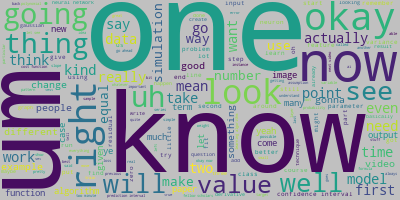

In [ ]:
long_string = ','.join(list(test_df.sentence.values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="silver", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [ ]:
!pip install flair
!pip install transformers

In [ ]:
!pip install sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(test_df.sentence, show_progress_bar=True)

In [18]:
!pip install transformers

     |████████████████████████████████| 3.4 MB 5.0 MB/s 
     |████████████████████████████████| 895 kB 29.5 MB/s 
     |████████████████████████████████| 3.3 MB 41.1 MB/s 
     |████████████████████████████████| 596 kB 50.4 MB/s 
     |████████████████████████████████| 67 kB 4.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [19]:
!pip install textstat

     |████████████████████████████████| 101 kB 3.7 MB/s 
     |████████████████████████████████| 2.0 MB 19.4 MB/s 


In [114]:
!pip install hdbscan

     |████████████████████████████████| 6.4 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311904 sha256=9a50e19f44ff0429a3e4845fd1df38f62674a793ed02f55cc36bba77f65e03bf
  Stored in directory: /root/.cache/pip/wheels/73/5f/2f/9a259b84003b84847c259779206acecabb25ab56f1506ee72b
Successfully built hdbscan


In [ ]:
!pip install umap-learn

In [ ]:

import umap
umap_embeddings = umap.UMAP(n_neighbors=15, 
                            n_components=50, 
                            metric='cosine').fit_transform(embeddings)

In [130]:
import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=17,
                          metric='l1',                      
                          cluster_selection_method='eom').fit(X)

In [131]:
np.unique(cluster.labels_)

array([-1,  0,  1])

In [ ]:
import numpy as np
np.unique(cluster.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [ ]:
from flair.embeddings import TransformerDocumentEmbeddings
from flair.data import Sentence
from tqdm.notebook import tqdm
doc_e=[]
doc_embedding = TransformerDocumentEmbeddings('roberta-large')

for d in tqdm(test_df.sentence):
  sent=Sentence(d)
  doc_embedding.embed(sent)
  doc_e.append(sent.embedding.detach().cpu().numpy())

In [21]:
import textblob
import textstat
from transformers import pipeline

classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [22]:
test_df.to_csv('./speakers.csv')

In [45]:
from tqdm.notebook import tqdm
import textblob
import textstat
# result = classifier("I hate you")[0]
# print(f"label: {result['label']}, with score: {round(result['score'], 4)}")

# result = classifier("I love you")[0]
# print(f"label: {result['label']}, with score: {round(result['score'], 4)}")
def featurize(sentence):
  result=classifier(sentence)[0]
  feeling=1 if result['label']=='POSITIVE' else -1
  feeling_intensity=result['score']
  ari=textstat.automated_readability_index(sentence)
  avg_wd=textstat.difficult_words(sentence)
  testimonial = textblob.TextBlob(sentence)
  exclamation=sentence.count('!')
  question=sentence.count('?')
  i=sentence.count(' i ')
  you=sentence.count(' you ')
  we=sentence.count(' we ')
  they=sentence.count(' they ')
  numbers=sum([1 for t in sentence if t.isnumeric()])
  return [feeling,feeling_intensity,ari,avg_wd,testimonial.sentiment.polarity
          ,testimonial.sentiment.subjectivity,exclamation,question,i,you,we,they,numbers]
features=[featurize(sentence) for sentence in tqdm(test_df.sentence)]

  0%|          | 0/1481 [00:00<?, ?it/s]

In [182]:
speaker1=[
               'oh my goodness','fellow','károly','two minute papers','what a time','on to your papers','wow','down the line'
]
speaker2=['confidence interval','this video is brought']
speaker3=['python','python','numpy','scikit','tensorflow','pytorch','keras']
speaker4=[' um ']
speaker5=['3b1b','theorem']
sents_speaker1=[]
for idx,sent in enumerate(test_df.sentence):
  if any([True if p in sent else False for p in speaker1]):
    sents_speaker1.append(idx)

In [187]:
len(sents_speaker1)

96

In [136]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = TfidfVectorizer(stop_words='english',min_df=5,max_df=1500,ngram_range=(1,3),max_features=3000)
X = vectorizer.fit_transform(test_df.sentence)

In [31]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import MinMaxScaler
import numpy as np
lda=LatentDirichletAllocation()
X=lda.fit_transform(MinMaxScaler(feature_range=(0,1)).fit_transform(np.array(features)))

In [80]:
X

<1481x1522 sparse matrix of type '<class 'numpy.int64'>'
	with 25075 stored elements in Compressed Sparse Row format>

In [ ]:
classes=lda.predict(MinMaxScaler(feature_range=(0,1)).fit_transform(np.array(features)))

In [42]:
len(vectorizer.vocabulary_)

113

In [ ]:
!pip install networkx==2.6.2

     |████████████████████████████████| 1.9 MB 4.3 MB/s 
  Attempting uninstall: networkx
    Found existing installation: networkx 2.5
    Uninstalling networkx-2.5:
      Successfully uninstalled networkx-2.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
from sklearn.decomposition import TruncatedSVD
lsi=TruncatedSVD(n_components=300)
X=lsi.fit_transform(X)

In [ ]:
!pip install karateclub

In [15]:
!pip install h2o

     |████████████████████████████████| 175.8 MB 33 kB/s 
  Created wheel for h2o: filename=h2o-3.34.0.7-py2.py3-none-any.whl size=175908084 sha256=c5c7db42ca4aab907a4fb830c2aab5a3a040cd3ee886a81bc6e5cc8829254a2a
  Stored in directory: /root/.cache/pip/wheels/df/df/05/1f2ac68a5d9bf38b74f2b8218443b2c00f1a5f4f3154ec11b6
Successfully built h2o


In [ ]:
import pandas as pd
df=pd.DataFrame(X.toarray())
df

In [17]:
predictors=df.columns
df.to_csv('train.csv')

In [35]:
import h2o
from h2o.estimators import H2OKMeansEstimator
h2o.init()

# Import the iris dataset into H2O:
iris = h2o.import_file("./train.csv")

# Set the predictors:
# predictors = ["sepal_len", "sepal_wid", "petal_len", "petal_wid"]

# Split the dataset into a train and valid set:
train, valid = iris.split_frame(ratios=[.95], seed=1234)

# Build and train the model:
iris_kmeans = H2OKMeansEstimator(k=10,
                                 estimate_k=False,
                                 standardize=True,
                                max_iterations=10000,
                                 
                                 seed=1234)
iris_kmeans.train(x=predictors.values.tolist(),
                  training_frame=train,
                  validation_frame=valid)

# Eval performance:
perf = iris_kmeans.model_performance()

#  Generate predictions on a validation set (if necessary):
pred = iris_kmeans.predict(valid)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


--------------------------  ------------------------------------------------------------------
H2O_cluster_uptime:         18 mins 10 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.34.0.7
H2O_cluster_version_age:    18 days
H2O_cluster_name:           H2O_from_python_unknownUser_s6ufr2
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.169 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.7.12 final
--------------------------  ------------------------------------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


#Encoded Kmean Runs


In [19]:
from sklearn.preprocessing import StandardScaler
scl=StandardScaler()
X=scl.fit_transform(np.array(features))

In [44]:
X=np.c_[X.toarray(),np.array(features)]

In [235]:
seeds=np.arange(1,1001,2)


(500,)

In [ ]:
from tqdm.notebook import tqdm
from sklearn.cluster import KMeans,AgglomerativeClustering,SpectralClustering,MiniBatchKMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import davies_bouldin_score,silhouette_score,calinski_harabasz_score
import random
from collections import Counter
import numpy as np
n_runs=500
true_k = 10
run_results=[]
run_scores=[]
seeds=np.arange(1,1001,2)
# X=np.array(features)
for i in tqdm(range(n_runs)):

  model = KMeans(n_clusters=10, init='k-means++',n_init=10, max_iter=1000,random_state=seeds[i])
  X_pred=model.fit_predict(X.toarray())
  # print(Counter(X_pred))
  enc=OneHotEncoder()
  run_results.append(enc.fit_transform(X_pred.reshape(-1,1)).toarray())
  run_scores.append(davies_bouldin_score(X.toarray(),model.predict(X)))
  print(run_scores[i])


In [ ]:
import numpy as np
np.sort(run_scores)

In [277]:
import numpy as np
final_X=np.stack([x for x,xdash in zip(run_results,run_scores) if xdash<np.quantile(run_scores,.55) ],axis=1)
final_X=final_X.reshape(-1,final_X.shape[1]*final_X.shape[2])
final_X.shape

(1481, 2750)

In [148]:
final_X.shape

(1481, 2000)

# Generating Predictions
Clustering using K-Means.

In [178]:
from sklearn.ensemble import RandomTreesEmbedding
trans=RandomTreesEmbedding(max_depth=4,n_estimators=1000)
transformed=trans.fit_transform(X)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,AgglomerativeClustering,SpectralClustering,MiniBatchKMeans
from sklearn.metrics import davies_bouldin_score,silhouette_score,calinski_harabasz_score
inertias=[]
for i in range(2,17):
  model = KMeans(n_clusters=i, init='k-means++',n_init=10, max_iter=1000)
  model.fit(final_X)
  print(i, davies_bouldin_score(final_X,model.predict(final_X)),silhouette_score(final_X,model.predict(final_X)),calinski_harabasz_score(final_X,model.predict(final_X)))
  inertias.append(model.inertia_)
plt.plot(inertias)
plt.yscale('log')

In [39]:
X=np.argmax(X,axis=1)

In [266]:
final_X.shape

(1481, 3500)

In [278]:
submission = test_df

In [279]:
model = KMeans(n_clusters=10, init='k-means++',n_init=10, max_iter=1000,random_state=1)
submission['prediction'] = model.fit_predict(final_X)

In [280]:
from collections import Counter
#speaker 1 introduces himself as dr karoly who exhibits high emotion/amazement (easy to distinguish)
speaker1=[
'oh my goodness','fellow','károly','two minute papers','what a time','on to your papers','down the line','excellent'
]
#speaker 2 many occurances of confidence intervals
speaker2=['confidence interval']
# mentions of python libraries and models
speaker3=['python','python','numpy','scikit','tensorflow','pytorch','keras']
#speaker quotes in the dataset
speaker5=['3b1b']
for speaker in [speaker1,speaker2,speaker3,speaker5]:
  sents_speaker=[]
  for idx,sent in enumerate(test_df.sentence):
    if any([True if p in sent else False for p in speaker]):
      sents_speaker.append(idx)
  submission.loc[sents_speaker,'prediction']=Counter(submission.iloc[sents_speaker].prediction.values).most_common(1)[0][0]

In [ ]:
!rm -rf assets
!mkdir assets
submission.to_csv(os.path.join("assets", "submission.csv"))


# Submitting our Predictions

Note : Please save the notebook before submitting it (Ctrl + S)


In [ ]:
%aicrowd notebook submit -c speaker-identification -a assets --no-verify